In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración general
np.random.seed(42)  # Para reproducibilidad
n_days = 360  # Número de días (180 días ≈ 6 meses)

# Parámetros para la distribución normal truncada del gasto
max_spend = 5000  # Gasto máximo
min_spend = 200  # Gasto mínimo

In [ ]:
platforms = {
    'Google Ads': {'cpc': 1.5, 'ctr': 0.02, 'alpha': 0.000002, 'beta': 0.05},
    'Facebook Ads': {'cpc': 1.2, 'ctr': 0.015, 'alpha': 0.0000018, 'beta': 0.045},
    'Programmatic': {'cpc': 0.8, 'ctr': 0.012, 'alpha': 0.0000015, 'beta': 0.04}
}

In [4]:
# Crear el rango de gasto
spend_values = np.linspace(min_spend, max_spend, n_days)

# Ajustar CPA para Google Ads (logarítmica inversa)
a_g, b_g = -5, 100  # La curva empezará cerca de 120 y se ajusta lentamente
cpa_google = a_g * np.log(spend_values + 1) + b_g

# Mantener CPA para Facebook Ads (sigmoidea)
L_fb, k_fb, x0_fb, b_fb = 70, 0.0015, 2000, 40
cpa_facebook = L_fb / (1 + np.exp(-k_fb * (spend_values - x0_fb))) + b_fb

# Mantener CPA para Programmatic (exponencial)
c_p, d_p = 0.02, 0.0006
cpa_programmatic = c_p * np.exp(d_p * spend_values) * 500 + 30

def generate_data(platform, params, n_days):
    data = []

    for day in range(len(spend)):
        date = pd.Timestamp('2023-01-01') + pd.Timedelta(days=day)
        spend = spend_values[day]
        impressions = clicks / params['ctr']
        clicks = spend / params['cpc']
        ctr = params['ctr']
        conversions =
        cpa =
        

        data.append(['date', 'platform', 'spend', 'impressions', 'clicks', 'ctr', 'conversions', 'cpa'])

# Generar datos para las plataformas
all_data = []
for platform, params in platforms.items():
    platform_data = generate_data(platform, params, n_days)
    all_data.extend(platform_data)

# Crear DataFrame para almacenar los datos
df_cpa = pd.DataFrame({
    'Gasto (€)': gasto,
    'Google Ads CPA': cpa_google,
    'Facebook Ads CPA': cpa_facebook,
    'Programmatic CPA': cpa_programmatic,
    'Google Ads Clics': clicks_google,
    'Facebook Ads Clics': clicks_facebook,
    'Programmatic Clics': clicks_programmatic,
    'Google Ads Impresiones': impressions_google,
    'Facebook Ads Impresiones': impressions_facebook,
    'Programmatic Impresiones': impressions_programmatic
})
# Guardar el nuevo dataset
df_cpa.to_csv('data.csv', index=False)

ValueError: Could not interpret value `CTR` for `y`. An entry with this name does not appear in `data`.

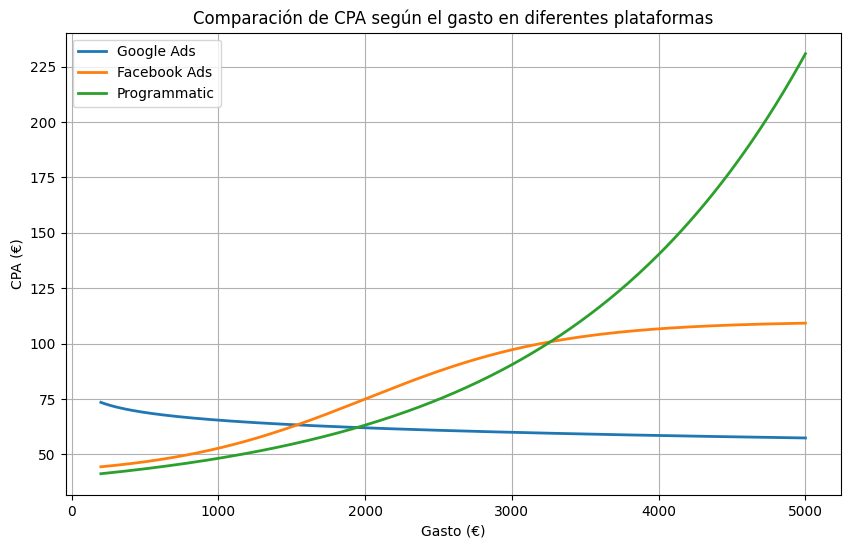

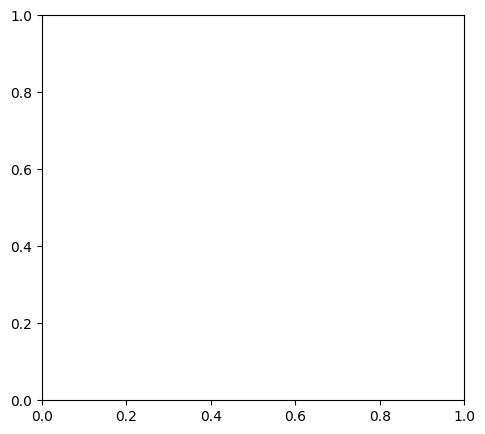

In [6]:
# Gráfico de CPA vs Gasto para las 3 plataformas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Gasto (€)', y='Google Ads', data=df, label='Google Ads', linewidth=2)
sns.lineplot(x='Gasto (€)', y='Facebook Ads', data=df, label='Facebook Ads', linewidth=2)
sns.lineplot(x='Gasto (€)', y='Programmatic', data=df, label='Programmatic', linewidth=2)
plt.title('Comparación de CPA según el gasto en diferentes plataformas')
plt.ylabel('CPA (€)')
plt.xlabel('Gasto (€)')
plt.grid(True)
plt.legend()

# EDA: Gasto vs CTR y Gasto vs CPA
plt.figure(figsize=(12, 5))

# Gasto vs CTR
plt.subplot(1, 2, 1)
sns.scatterplot(x='Gasto (€)', y='CTR', hue='Plataforma', data=df, alpha=0.7)
plt.title('Gasto (€) vs CTR (Exponential Decay)')

# Gasto vs CPA
plt.subplot(1, 2, 2)
sns.scatterplot(x='Gasto (€)', y='CPA', hue='Plataforma', data=df, alpha=0.7)
plt.title('Gasto (€) vs CPA (Exponential Decay)')

plt.tight_layout()
plt.show()